In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
%matplotlib inline 

In [3]:
df_train=pd.read_csv("train.csv")
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


C:\Users\takakonoPC\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df_test=pd.read_csv("test.csv")
df_test.info()
df_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


C:\Users\takakonoPC\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,NaN,0.000000,0.000000,NaN
50%,1100.500000,3.000000,NaN,0.000000,0.000000,NaN
75%,1204.750000,3.000000,NaN,1.000000,0.000000,NaN
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train['Embarked']=df_train['Embarked'].map({'S':1, 'C':2,'Q':3})

In [7]:
df_train['Sex']= df_train['Sex'].map({'female': 1, 'male': 0})

In [ ]:
df_test['Sex']= df_test['Sex'].map({'female': 1, 'male': 0})

In [ ]:
df_test.head()

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0


In [10]:
df_train_selected=df_train[('PassengerId','Pclass', 'Sex','Age','SibSp','Parch','Fare','Embarked')] 


KeyError: ('PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked')

In [ ]:
df_train['Sex'].head()

In [18]:
df_train_check=df_train.iloc[:,(0,1,2,4,5,6,7,9,11)]

In [19]:
df_train_check.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,1.0
1,2,1,1,1,38.0,1,0,71.2833,2.0
2,3,1,3,1,26.0,0,0,7.9250,1.0
3,4,1,1,1,35.0,1,0,53.1000,1.0
4,5,0,3,0,35.0,0,0,8.0500,1.0


In [ ]:
df_gender_sub = pd.read_csv("gender_submission.csv")
df_gender_sub.info()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CDADF1D438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001CDBA0944E0>]], dtype=object)

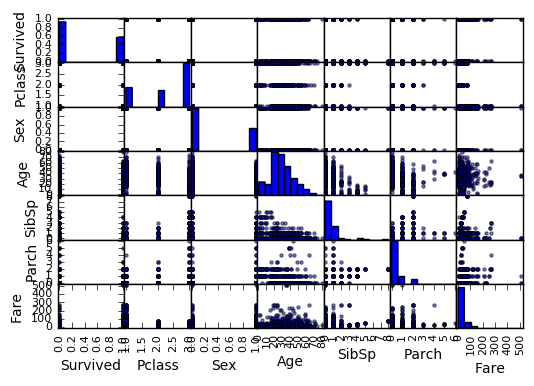

In [24]:
scatter_matrix(df_train_check.iloc[:,1:8])

ValueError: max must be larger than min in range parameter.

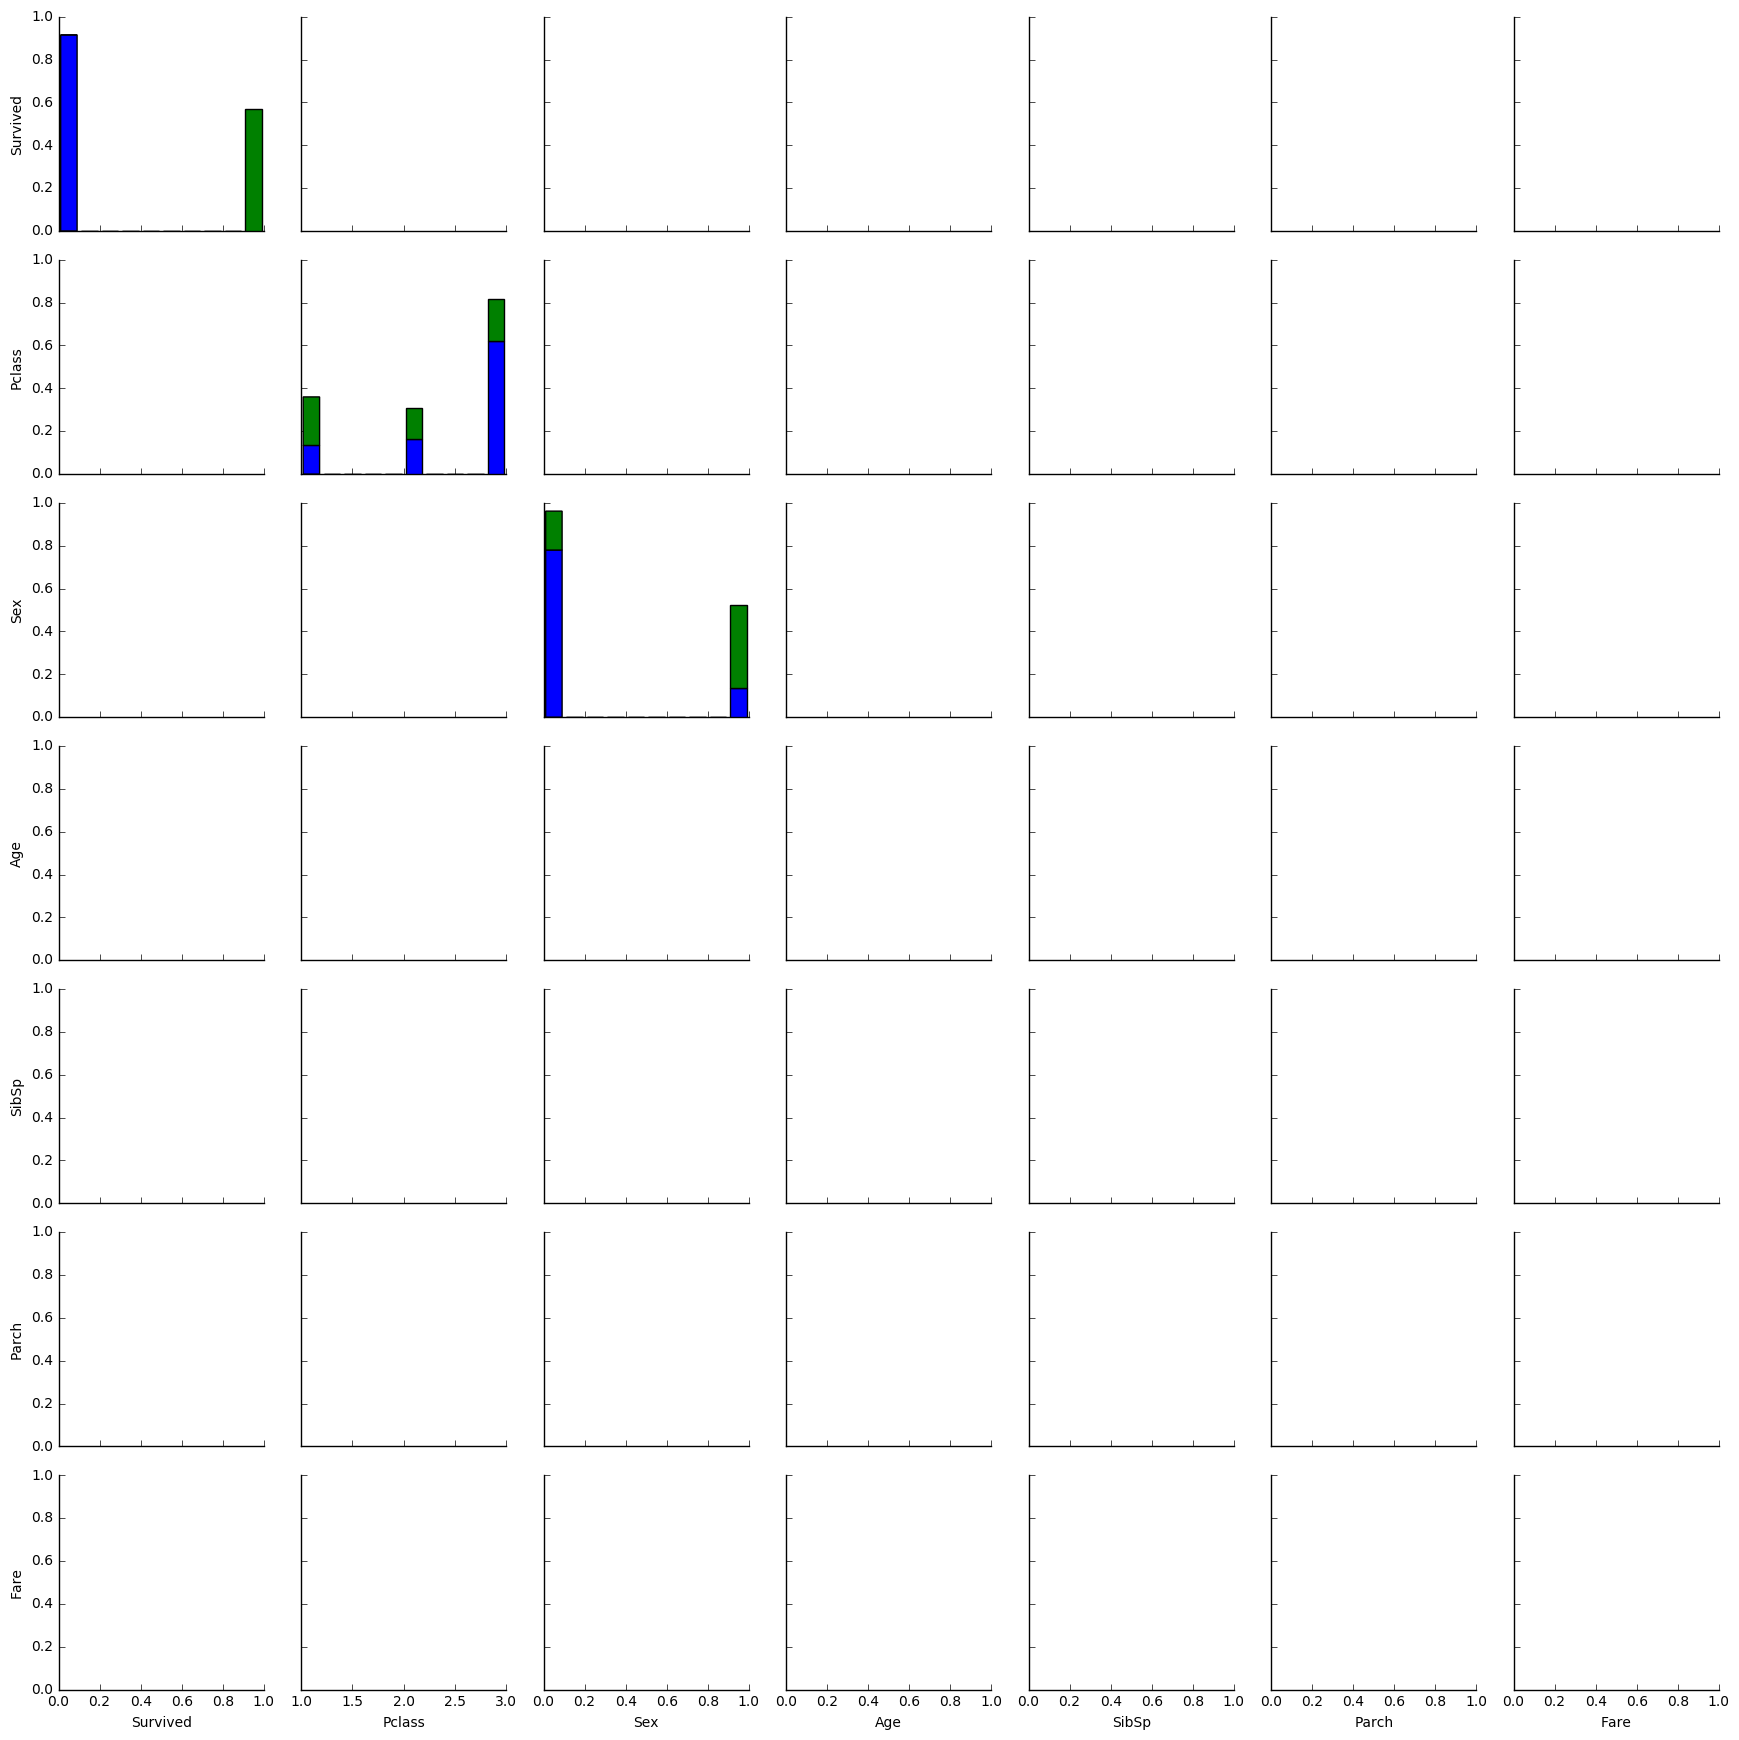

In [25]:
g=sns.pairplot(df_train_check.iloc[:,1:8], hue='Survived')

In [ ]:
correlations = df_train.corr()
names=['']
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [ ]:
ax = sns.boxplot(x="Sex", y="Fare", hue="Pclass",data=df_train, palette="Set3")

In [ ]:
ax = sns.boxplot(x="Sex", y="Fare", hue="Survived",data=df_train, palette="Set3")

In [ ]:
ax = sns.boxplot(x="Sex", y="Age", hue="Survived",data=df_train, palette="Set3")

In [ ]:
ax = sns.boxplot(x="SibSp", y="Age", hue="Survived",data=df_train, palette="Set3")

In [ ]:
df_train.isnull().sum()

In [ ]:
sns.countplot(x='Survived',data=df_train)

In [2]:
# Importing modules
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB